# Homework 9, Part II: Developing a Neural Network Model with TensorFlow

This homework is based on the materials covered in week 10 about using TensorFlow to develop a Neural Network. You will work with a dataset containing information about red wine, and train a Neural Network to classify wine quality. 

You need to use Python, in particular the TensorFlow library. You are free to use existing Python libraries. Please make sure your codes can run successfully, no points will be given for a question if the code fails to run. 

### 1. Preparation: load dataset and complete the steps to create training and testing datasets. [1.5 points]
Download the dataset 'winequality-red.csv' and load the dataset as a dataframe. If you are using Google Colab, refer to Lab 2 in week 10 on how to load the dataset.

In [10]:
import pandas as pd
''' TO DO: code for loading dataset '''
df = pd.read_csv("winequality-red.csv", delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


The target label is stored in the column 'quality'. Since the 'quality' column is a categorical feature, it needs to be converted with one-hot encoding.

After performing the needed encoding, split the dataset into features (X) and label (y), then create training and testing datasets.


In [11]:
''' TO DO: code for one-hot encoding '''
''' TO DO: code for one-hot encoding '''
# Assuming 'quality' is the target label
target_label = 'quality'

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=[target_label])
# drop old label
#df.drop(['quality'], axis=1, inplace=True)
# Perform one-hot encoding with drop_first
df_encoded = pd.get_dummies(df, columns=[target_label], drop_first=True)

# Display the first few rows of the DataFrame after one-hot encoding
df_encoded.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_4,quality_5,quality_6,quality_7,quality_8
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,False,True,False,False,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,False,True,False,False,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,False,True,False,False,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,False,False,True,False,False
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,False,True,False,False,False


In [12]:
''' TO DO: code for storing features as X and class labels as y'''
X = df_encoded.drop(columns=df_encoded.filter(like=target_label).columns)  # Features
y = df_encoded.filter(like=target_label)  # Target labels
X.shape, y.shape

((1599, 11), (1599, 5))

In [13]:
''' TO DO: code for splitting training and testing dataset with 80/20 split'''
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1279, 11)
X_test shape: (320, 11)
y_train shape: (1279, 5)
y_test shape: (320, 5)


### 2. Define a neural network model [1 point]
Use `Keras` library to define a neural network model as specified below:
- The model uses 4 hidden layers, each layer has 64 nodes and uses the ReLU activation function.
- The output layer has the same number of nodes as the number of classes and uses the sigmoid activation function.

In [19]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# Create a Sequential model
model = Sequential()

# Add 4 hidden layers with 64 nodes and ReLU activation function
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Assuming X_train is your training feature set
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))

# Add the output layer with the sigmoid activation function
# Set num_classes to 1 for binary classification
# Set num_classes to the number of classes for multi-class classification
num_classes = 5  # Adjust accordingly
model.add(Dense(num_classes, activation='sigmoid'))

# Display model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                768       
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 5)                 325       
                                                                 
Total params: 13573 (53.02 KB)
Trainable params: 13573 (53.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 3. Compile the neural network model [1 point]
Compile the created model with the following specifications:
- Use cross entropy loss function
- Use gradient descent as the optimization algorithm, namely, the 'SGD' optimizer
- Use classification accuracy as the performance metric

In [15]:
''' TO DO: compile the neural network model'''
model.compile(loss='categorical_crossentropy',  # Cross-entropy loss for binary classification
              optimizer='sgd',  # Stochastic Gradient Descent optimizer
              metrics=['accuracy'])  # Classification accuracy as the performance metric

### 4. Train the neural network model [1 point]
Next, train the neural network on training data using batches of 40 data points for 200 epochs, with 10 percent of the training data used for validation.

Epoch 1/200
29/29 [==============================] - 0s 3ms/step - loss: 1.4112 - accuracy: 0.4344 - val_loss: 1.0938 - val_accuracy: 0.4609
Epoch 2/200
29/29 [==============================] - 0s 821us/step - loss: 1.1378 - accuracy: 0.4831 - val_loss: 1.0438 - val_accuracy: 0.5391
Epoch 3/200
29/29 [==============================] - 0s 804us/step - loss: 1.1408 - accuracy: 0.4917 - val_loss: 1.0720 - val_accuracy: 0.5000
Epoch 4/200
29/29 [==============================] - 0s 870us/step - loss: 1.1171 - accuracy: 0.4839 - val_loss: 1.0391 - val_accuracy: 0.5312
Epoch 5/200
29/29 [==============================] - 0s 791us/step - loss: 1.1116 - accuracy: 0.4926 - val_loss: 1.0983 - val_accuracy: 0.4688
Epoch 6/200
29/29 [==============================] - 0s 850us/step - loss: 1.1046 - accuracy: 0.4987 - val_loss: 1.0873 - val_accuracy: 0.5078
Epoch 7/200
29/29 [==============================] - 0s 774us/step - loss: 1.0958 - accuracy: 0.5109 - val_loss: 1.0689 - val_accuracy: 0.5156
E

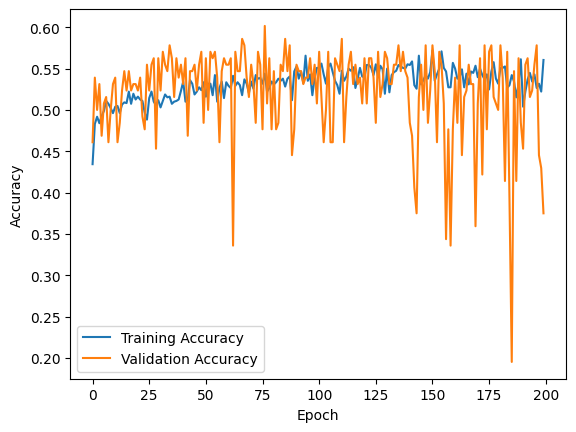

In [16]:
''' TO DO: training the neural network model'''
# Train the model
history = model.fit(X_train, y_train, batch_size=40, epochs=200, validation_split=0.1)

import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 5. Evaluate the neural network model [0.5 point]
Evaluate the trained model on testing data, and report the classification accuracy.

In [17]:
''' TO DO: evaluate on testing data'''

loss, accuracy = model.evaluate(X_test, y_test)
print ("testing accuracy is: %.2f"%(accuracy*100))

10/10 [==============================] - 0s 464us/step - loss: 1.5109 - accuracy: 0.4187
testing accuracy is: 41.87


### BONUS: Improve the Neural Network Model [2 points]

The model developed in the previous parts gives relatively low accuracy on the testing data. For bonus points, try to develop a better neural network model to improve the testing accuracy as much as possible. 

In [18]:
''' Optional TO DO: develop a better neural network model'''
import tensorflow as tf
from keras.layers import Dropout

# Adjust model architecture with dropout
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))  # Add dropout layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Add dropout layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Add dropout layer
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Use 'softmax' for multi-class classification

from keras.optimizers import Adam

# Adjust learning rate and optimizer
custom_optimizer = Adam(learning_rate=0.001)  # Adjust the learning rate
model.compile(loss='categorical_crossentropy', optimizer=custom_optimizer, metrics=['accuracy'])

from keras.callbacks import LearningRateScheduler

# Example of a learning rate schedule function
def lr_schedule(epoch):
    lr = 0.001
    if epoch > 50:
        lr *= 0.1
    return lr
# Use LearningRateScheduler during model training
lr_scheduler = LearningRateScheduler(lr_schedule)

from sklearn.preprocessing import StandardScaler

# Scale input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from keras.preprocessing.image import ImageDataGenerator

# Example of data augmentation for images
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
from keras.callbacks import EarlyStopping

# Example of early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)